In [4]:
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from scipy.stats import logistic

MC_N = 50
MC_θ = np.zeros((MC_N,4))
MC_y = np.zeros((MC_N,4))
MC_t = np.zeros((MC_N,4))

for j in range(MC_N):
    import numpy as np
    N = 5000
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = 0.5
    α_y = 0.5
    x = np.random.normal(0,σ_x,N)
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.random.binomial(1,0.5, (N))
    y = np.power(α_y * x, 2) + θ * t + e_y
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)
    data = np.c_[y,t,x]
    print(data[0:5])
    
    # OLS - Full Estimation
    model_OLS = sm.OLS(y, np.c_[t,x])
    res = model_OLS.fit()
    θ_OLS = res.params[0]
    # OLS First Stage: Y
    model_OLS = sm.OLS(y, np.c_[x])
    res_y = model_OLS.fit()
    θ_OLS_y = res_y.params[0]    
    # Logistic First Stage
    clf = LogisticRegression(random_state=0).fit(x, t)
    
    # DML Lasso
    model_Lasso = LinearDML(discrete_treatment=True, random_state=1)
    model_Lasso.fit(y, t, X=None,W=x)
    θ_DMLL = model_Lasso.intercept_

    # DML RF
    model_XGB = LinearDML(discrete_treatment=True, 
                          model_y = CatBoostRegressor(learning_rate=0.01, verbose = False), 
                          model_t = CatBoostClassifier(learning_rate=0.01, verbose = False))
    model_XGB.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_XGB.intercept_
    
    # DML NN - First Stage
    model_NN = LinearDML(discrete_treatment=True, 
                         model_y = MLPRegressor(hidden_layer_sizes=(20,)), 
                         model_t = MLPClassifier(hidden_layer_sizes=(20,)))
    model_NN.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_NN.intercept_


    MC_θ[j] = [θ_OLS, model_Lasso.intercept_, model_XGB.intercept_, model_NN.intercept_]
    MC_y[j] = [res_y.rsquared, np.mean(model_Lasso.nuisance_scores_y), np.mean(model_XGB.nuisance_scores_y),np.mean(model_NN.nuisance_scores_y)]
    MC_t[j] = [clf.score(x,t), np.mean(model_Lasso.nuisance_scores_t), np.mean(model_XGB.nuisance_scores_t),np.mean(model_NN.nuisance_scores_t)]
    
    

[[-1.65193313  1.         -0.18021264]
 [ 0.99832434  0.          0.62813749]
 [ 0.80066061  1.         -2.23300764]
 [-0.67343148  1.         -0.70497327]
 [ 1.55756575  1.         -0.97901968]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.9104877   1.         -1.19767293]
 [ 0.09215433  0.          0.49936587]
 [ 0.01961923  1.          0.18478671]
 [ 0.48011954  0.         -1.13748045]
 [ 0.50467254  1.         -0.19785298]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.78344427  0.         -1.09179588]
 [ 1.49697676  1.         -1.39125297]
 [-0.06379728  1.         -0.08789492]
 [ 1.17719464  1.         -0.98023703]
 [-0.89349312  0.         -0.13207242]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.40197312  1.          0.68130358]
 [ 0.22135514  1.         -0.96959418]
 [-1.19487729  0.         -0.48399645]
 [ 3.51191966  1.          1.03787292]
 [-0.38521834  1.          0.37527244]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.35890097  0.         -1.35961288]
 [ 1.78390822  1.          2.39338218]
 [ 0.39929414  1.          0.48313993]
 [-0.21039036  0.         -0.02996972]
 [ 1.85461972  1.          0.37466697]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.53746393  1.          0.95320568]
 [-0.13169231  0.         -0.33856982]
 [-0.22105698  0.         -1.35682192]
 [-0.36699342  1.         -0.16988158]
 [ 2.59847122  1.         -2.30802996]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.95934471  1.          0.2755012 ]
 [-0.26759894  0.          0.31959431]
 [ 0.44344183  0.          0.24460971]
 [-0.64539334  1.          0.7561672 ]
 [ 2.94112203  1.          2.12874517]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.83650508  0.          0.10859126]
 [ 0.43995248  1.         -0.46965104]
 [ 0.19899267  0.          0.70779899]
 [ 0.40795805  1.          0.81775291]
 [ 1.31117102  1.          1.27964951]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.48301489  0.          0.74679802]
 [ 0.68236316  1.          0.94292828]
 [-0.43726838  1.         -0.95457697]
 [ 1.28535308  1.         -1.24848982]
 [-0.79791166  0.         -0.92880712]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.16734815  0.         -0.47672532]
 [-0.60018245  0.          0.66415314]
 [ 0.35399336  1.          0.6852035 ]
 [-0.81296629  0.         -1.72736565]
 [ 1.67495146  1.         -1.82222879]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.82727882  0.         -1.41803431]
 [-0.84922848  0.         -1.47063   ]
 [-1.52971233  0.          0.75213755]
 [-0.67151896  0.         -0.83636794]
 [ 1.62593098  0.          2.35640071]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 5.15831209e-01  1.00000000e+00 -6.46663045e-01]
 [ 2.92822337e-04  0.00000000e+00  1.16333723e+00]
 [ 8.48363794e-02  0.00000000e+00  7.53783257e-01]
 [ 3.22560157e-01  0.00000000e+00  7.82927599e-01]
 [-1.18174232e+00  0.00000000e+00 -4.57904233e-02]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.25280995  1.          0.25725152]
 [ 1.57182423  1.         -0.57743478]
 [-0.65998735  0.          1.04949595]
 [ 1.73134393  1.         -0.65064116]
 [-0.57351996  0.         -0.22403644]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.38836752  0.          0.55109399]
 [ 1.8604264   0.          1.13987738]
 [-0.29472165  1.         -0.13819281]
 [ 0.52101806  1.         -1.07975018]
 [ 1.03374671  0.         -0.21803447]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.29574971  0.         -0.50522654]
 [ 0.55176059  1.          0.74645369]
 [ 1.38935591  1.          0.68767017]
 [ 0.8171784   1.          0.23368572]
 [ 0.80489906  1.          0.7762195 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.36779897  1.          0.42382387]
 [ 0.7810499   1.         -1.02467361]
 [ 0.4128501   0.          0.53010005]
 [ 0.41369664  0.         -0.87158625]
 [ 0.79568593  1.         -2.09605574]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.82147542  1.         -2.39529645]
 [ 0.30860639  1.          0.96154214]
 [-0.46852414  1.         -0.26557064]
 [ 1.33211344  1.         -0.68501812]
 [ 1.92463371  0.         -0.17917653]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.16101789  1.          1.36425593]
 [-1.40856735  0.         -0.56619331]
 [-0.41273793  0.          0.65459784]
 [-3.37417357  0.          1.25219408]
 [ 0.69422866  1.         -0.51639884]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.31341773  0.         -1.84638516]
 [ 1.16926362  1.          1.65640026]
 [ 0.99628278  1.          0.96443983]
 [ 0.4817722   0.          1.55009421]
 [-0.46436566  0.         -0.75771977]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.28244902  0.          1.01597312]
 [-0.56016647  1.         -1.32339419]
 [ 0.82884062  1.         -0.21606418]
 [ 3.84912484  0.         -2.62754657]
 [ 1.60384442  1.          0.37640153]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.1624853   0.         -1.65005121]
 [-1.08003174  1.          0.2985427 ]
 [ 0.66589695  1.          0.41837588]
 [ 2.26359782  1.          1.38280797]
 [ 0.77747908  0.          0.75067915]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.34376942  1.          1.46228795]
 [ 0.80495874  1.          2.05314075]
 [-0.29924426  0.          0.89028118]
 [-0.0120285   1.          1.29161716]
 [ 1.20351812  1.          1.53857105]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.73712397  0.          1.8591268 ]
 [ 1.21121701  1.         -1.00744846]
 [-0.24556607  0.         -2.22370783]
 [ 1.17468827  0.          0.76941346]
 [ 1.3797103   1.          0.93407447]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.10870162  0.         -0.09544861]
 [ 1.36963777  1.         -0.97502908]
 [-0.03827     0.         -0.48530549]
 [-0.30620056  0.          0.92592923]
 [ 0.99859398  1.          1.46985817]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.25176833  1.         -1.06422223]
 [-2.29867103  0.          0.91984647]
 [-0.81558496  0.         -0.08657746]
 [ 2.0201385   0.         -2.4606022 ]
 [ 2.59105818  1.         -1.49428697]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.50379947  1.          0.77984792]
 [-1.43453503  0.         -0.4622714 ]
 [ 2.09169863  1.         -1.41130027]
 [-0.87019847  1.          0.57757889]
 [ 1.58062785  1.         -2.17242996]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.40170584  0.          0.43877431]
 [-0.66722289  1.         -0.56810639]
 [ 1.09782567  0.          0.06165809]
 [-0.00671061  1.         -0.7717836 ]
 [ 0.40153561  0.          0.7149749 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.66993037  1.         -0.45669918]
 [-0.50188797  0.          0.4702146 ]
 [ 2.68819021  1.          3.10703776]
 [-0.03155702  0.         -0.46868995]
 [-0.10897217  1.          0.25199151]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.18232882  0.         -2.10600521]
 [-0.0118947   1.          0.30662126]
 [ 0.64460342  0.         -0.12208716]
 [-0.18493084  1.          0.12655814]
 [-1.48474679  0.         -0.20597849]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.72099483  1.         -0.29269602]
 [ 1.34076553  1.         -1.82823967]
 [ 0.37003683  1.          0.05952992]
 [-0.88897771  0.          0.84403882]
 [ 0.70214542  0.          1.25442569]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.33339392  1.          0.37790738]
 [ 2.31750987  1.          0.82633344]
 [-1.76969476  1.          0.32492995]
 [ 0.83802285  1.          0.85367065]
 [ 0.19364837  0.         -1.18785168]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.27604087  1.         -0.46686907]
 [-1.06996199  0.          0.30010121]
 [-0.49339724  0.         -0.14341902]
 [ 0.24302687  1.         -0.31647404]
 [-0.38818915  0.         -0.31994368]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.63662482  0.         -0.49159222]
 [ 0.9332531   1.         -0.97181498]
 [-0.51664309  0.         -0.93281022]
 [-1.58148694  0.          0.73238496]
 [ 0.75274692  1.          0.12831262]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.48851096  0.          0.72266932]
 [-0.52037191  0.          0.60226644]
 [ 0.13850026  1.         -0.19956982]
 [ 0.80509697  0.          1.26385195]
 [ 1.85130095  1.          0.30089422]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.40841491  1.          0.38996495]
 [ 0.87412393  0.         -0.09739481]
 [ 2.37400076  1.         -1.05706978]
 [-0.91016542  0.          0.25167102]
 [-0.02807397  0.          0.58615102]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.7218679   0.          0.70964747]
 [-0.64133441  0.         -0.0342245 ]
 [ 0.39310356  0.          0.77765064]
 [ 2.07650085  1.         -1.60974047]
 [ 0.43018019  0.          0.90370265]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.59526346  0.          1.31674935]
 [-0.67843622  0.         -0.07302305]
 [ 0.78644623  1.         -1.93208838]
 [ 1.34004338  0.         -0.16166171]
 [ 4.26993267  1.          0.94069627]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.16944214  0.         -0.89543428]
 [-0.50558517  0.          0.70214801]
 [ 2.7400333   1.          0.20016813]
 [-0.90389363  1.         -1.47366553]
 [ 1.06108521  1.         -0.3694845 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.22185134  0.         -0.39590632]
 [-0.15420993  0.         -0.04055984]
 [-0.014982    0.         -1.20167059]
 [-0.70465562  1.          0.42693445]
 [-0.46961395  0.         -0.26340624]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.55059691  0.         -0.2608561 ]
 [ 1.14279032  0.          0.63232687]
 [ 0.48251335  1.          0.10011251]
 [ 0.11833734  0.         -0.03100505]
 [-0.25192037  1.         -0.8580594 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.87628638  0.          1.10556217]
 [-1.67096265  1.          0.56086178]
 [-1.41666442  0.          0.34252068]
 [-1.47453038  0.          0.45220769]
 [-0.67718839  0.          1.00361495]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.2395587   0.          0.01180787]
 [ 1.00607155  0.         -0.69835725]
 [ 0.72619837  0.         -0.71975344]
 [ 0.59093247  0.          0.42195118]
 [ 0.67316714  0.          0.78709303]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.9782696   0.         -0.05940838]
 [ 0.41722735  0.         -0.1444765 ]
 [ 0.34293691  1.          1.02638086]
 [ 0.82107603  1.         -0.77477523]
 [-0.00114939  1.          1.12293156]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.87766305  1.         -1.65743975]
 [ 0.40509013  1.          0.99964451]
 [-0.16887826  0.          0.00431488]
 [-0.22318385  0.         -0.48731214]
 [ 1.17482122  1.          0.78919421]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.33897449  1.          0.90255842]
 [-0.00196073  1.          0.28990283]
 [-0.05584402  0.          1.70091656]
 [ 1.66682704  1.         -0.95639179]
 [ 1.67563552  0.         -1.59387617]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.51804007  1.         -1.53768015]
 [ 1.41125596  0.          0.96731453]
 [ 0.06088216  1.         -0.2423296 ]
 [-2.0387114   1.         -0.22092761]
 [ 0.54061849  1.         -1.00953134]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.15794069  0.         -0.50973154]
 [ 1.05624964  1.          0.08116624]
 [ 0.27086905  0.         -0.3458678 ]
 [ 0.22123083  1.         -0.38129765]
 [-0.47144351  0.         -0.93123646]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.39096644  1.          1.08044738]
 [ 1.05086596  1.         -2.32978145]
 [ 0.02076342  0.          0.62279594]
 [ 0.04348795  0.         -0.4940306 ]
 [-0.2455294   0.          0.22576089]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.06041551  0.         -0.22841136]
 [ 0.90876682  1.          1.83198388]
 [-0.17029498  0.          0.08962682]
 [ 2.50271147  1.          0.73551298]
 [ 2.24022668  1.          0.69932638]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.65533692  1.          1.61723136]
 [ 0.00579334  1.          0.63922912]
 [ 0.47058165  0.          1.66354351]
 [ 2.01168611  1.         -0.34063126]
 [-0.71357157  0.          0.15884981]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [5]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
table = PrettyTable()
table.field_names = ['Var', 'OLS','DML-L','DML-Boost','DML-NN']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
a = ['First Stage Y R2']+ np.mean(MC_y, axis = 0).tolist()
table.add_row(a)
a = ['First Stage D Accuracy']+ np.mean(MC_t, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+------------------------+-------+--------+-----------+--------+
|          Var           |  OLS  | DML-L  | DML-Boost | DML-NN |
+------------------------+-------+--------+-----------+--------+
|       Mean θ_hat       | 0.749 | 0.493  |   0.492   | 0.492  |
|      Stdev θ_hat       | 0.022 | 0.032  |   0.032   | 0.030  |
|  97.5 Quantile θ_hat   | 0.787 | 0.551  |   0.548   | 0.550  |
|   2.5 Quantile θ_hat   | 0.716 | 0.432  |   0.438   | 0.442  |
|    First Stage Y R2    | 0.000 | -0.001 |   0.094   | 0.099  |
| First Stage D Accuracy | 0.508 | 0.506  |   0.501   | 0.503  |
+------------------------+-------+--------+-----------+--------+


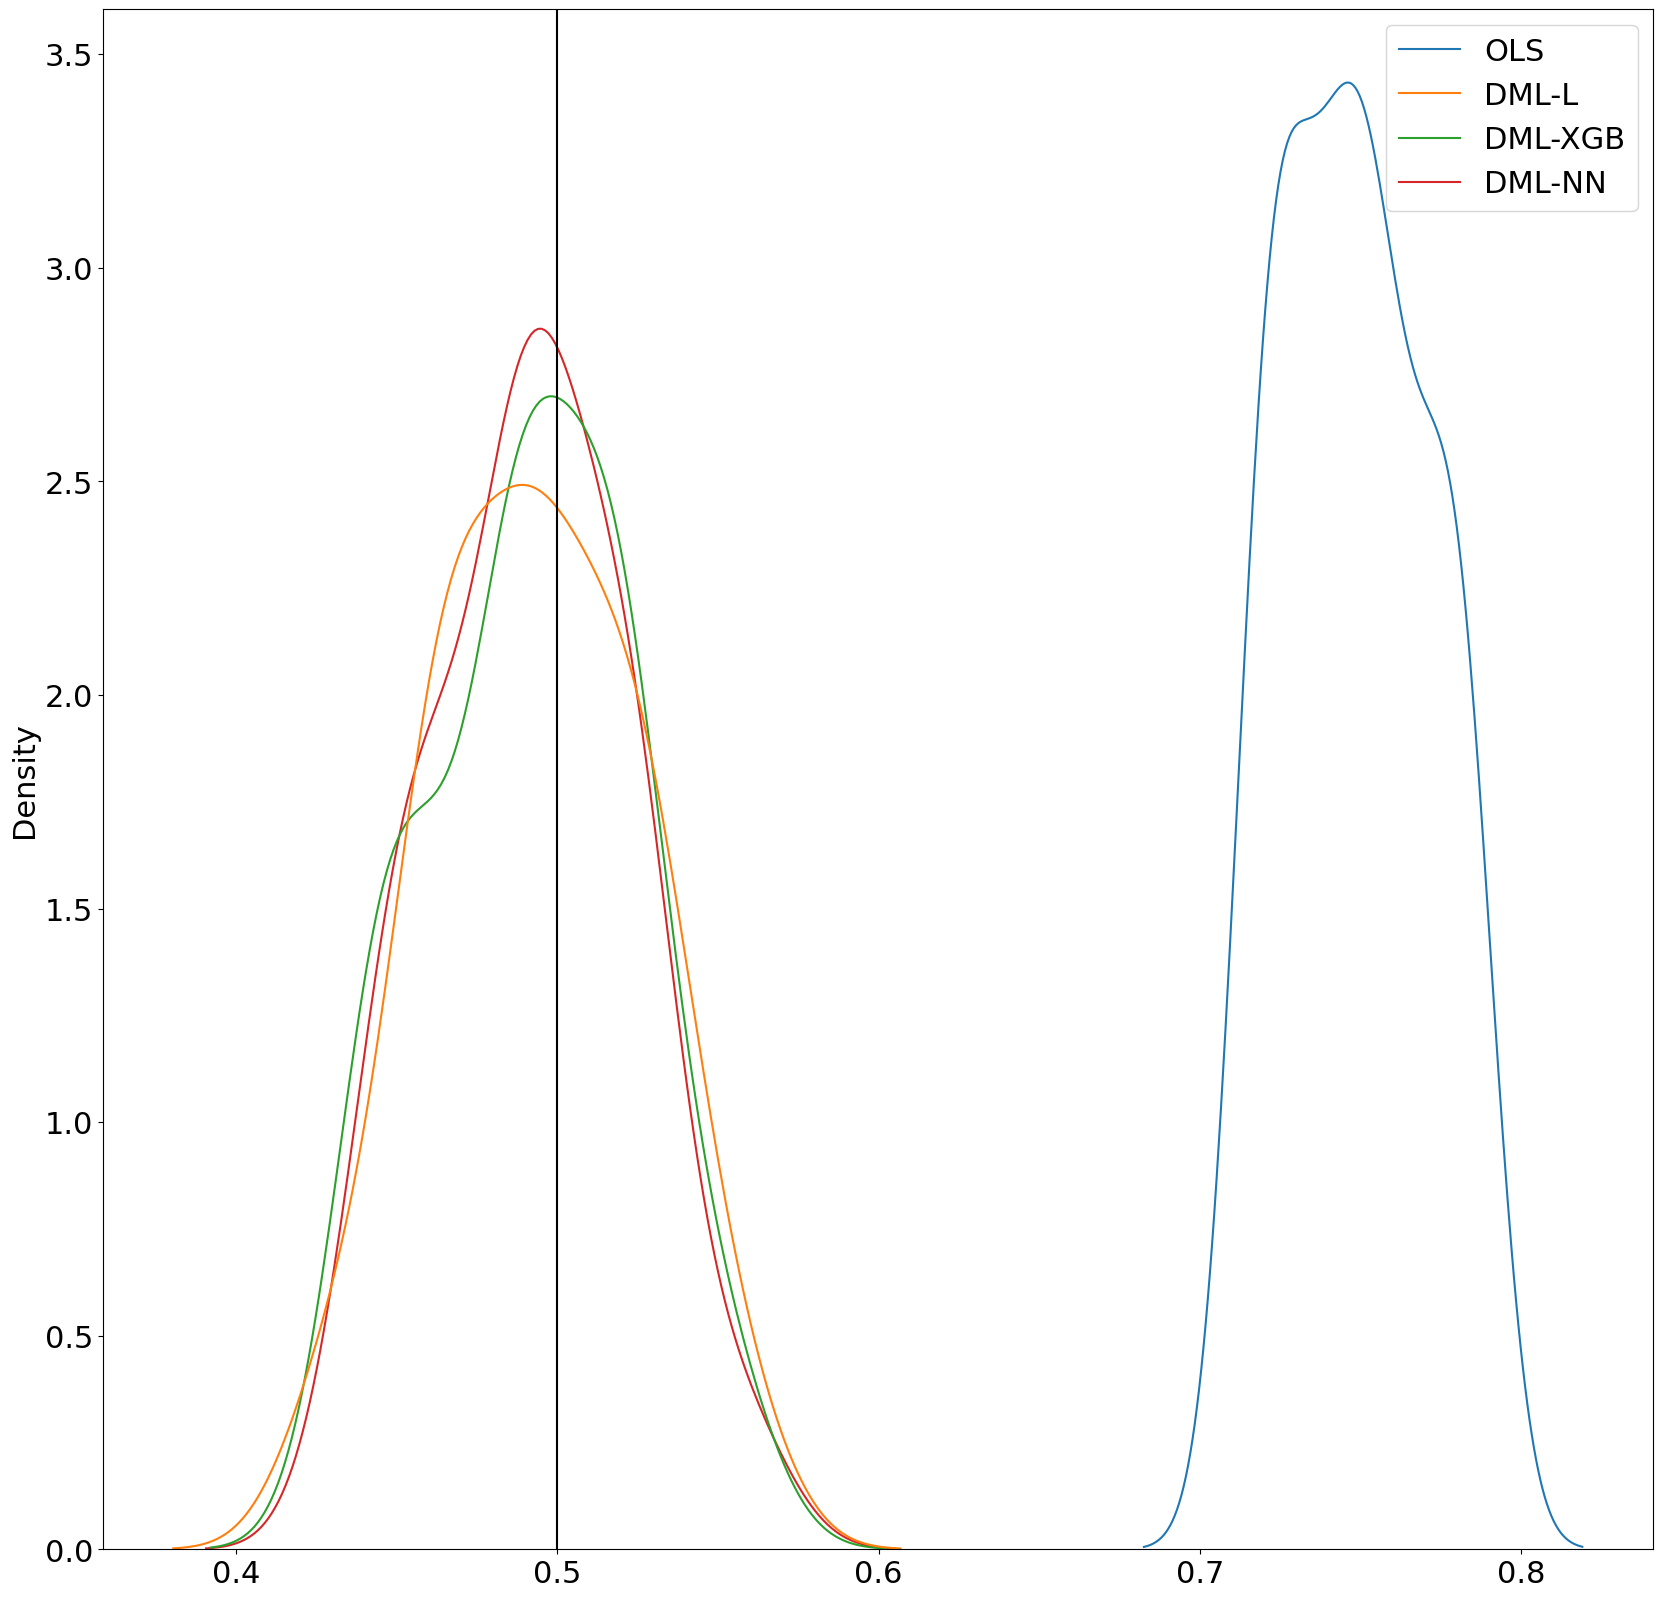

In [8]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(MC_θ,columns=['OLS','DML-L','DML-XGB','DML-NN'])
plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('ex3g.png')